In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


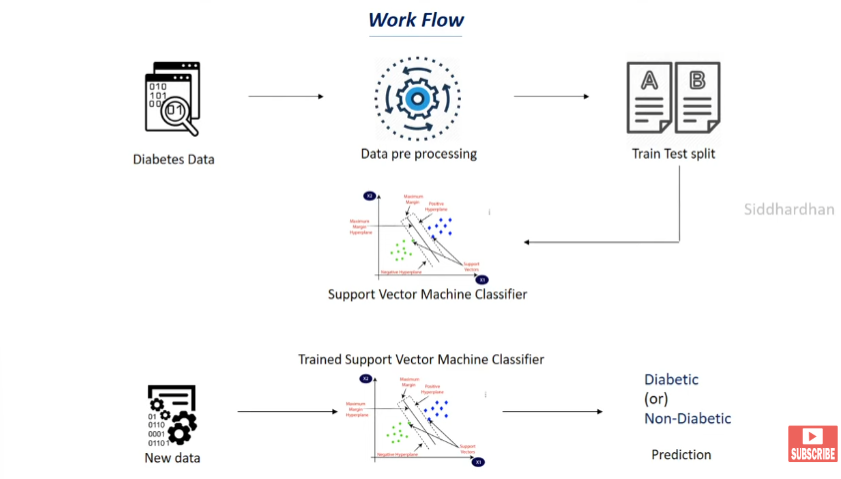

#STEP 1: Import dependencies, Read the CSV and go through the data

In [2]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
#Outcome = target variable = y = 0 for not diabetic, 1 for diabetic

#STEP 2: Splitting into features (X, without y) and target (y)


In [6]:
#Splitting into features (X, without y) and target (y)

X = df.drop(columns= 'Outcome', axis = 1) #for row drop, axis = 0. For col drop, axis = 1
y = df['Outcome']

In [7]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


#STEP 3: DATA STANDARDISATION aka X

In [9]:
#Transforming all the values to a common range.
#We use StandardScaler for this. Learn about the maths behind it later. Result is Array

#Here, we are standardising before TRAIN TEST split.

scaler = StandardScaler()



In [10]:
std = scaler.fit_transform(X)

In [11]:
print(std)
print(type(std)) #so pd DF transformed to np ARRAY coz ML loves arrays

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
<class 'numpy.ndarray'>


In [12]:
X = std #naming it X again. Thus we have trasformed 'X'. 'y' is unchanged

#STEP 4: TRAIN - TEST SPLIT

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.2, stratify=y, random_state = 2)

In [26]:
print(xtrain)
print('\n')
print(ytrain)
print('\n')
print(xtest)
print('\n')
print(ytest)

#STRATIFY means same proportions for X and y, it is optional but GOOD to include
#random_state: need more clarity

[[-1.14185152 -0.05929342 -3.57259724 ...  0.05170968 -0.9992857
  -0.78628618]
 [ 0.63994726 -0.49745345  0.04624525 ... -0.15136112 -1.05666795
   0.31985461]
 [-0.84488505  2.13150675 -0.47073225 ... -0.24020459 -0.2231152
   2.19178518]
 ...
 [ 2.12477957 -1.12339636  0.25303625 ... -0.24020459 -0.51908683
   0.14967911]
 [ 0.04601433 -0.27837344  0.45982725 ...  0.94014439 -0.71237443
   0.40494237]
 [-1.14185152 -1.09209922 -0.05715025 ...  0.48323511 -0.70633419
  -0.70119842]]


619    1
329    0
13     1
476    1
45     1
      ..
303    1
592    1
559    0
725    0
253    0
Name: Outcome, Length: 614, dtype: int64


[[-0.25095213 -0.46615631  0.14964075 ... -0.78595734 -0.79995787
  -0.53102292]
 [-0.25095213 -0.24707629 -1.29789624 ... -1.21748278 -1.00230582
  -0.95646168]
 [ 0.3429808   0.81702665  0.45982725 ...  0.2167047  -0.76673656
   2.7023117 ]
 ...
 [-0.54791859 -0.34096773  0.25303625 ...  0.05170968  0.6829204
  -0.53102292]
 [-0.54791859 -1.24858494  0.14964075 

In [73]:
xtest.shape #this is an np array

(154, 8)

In [28]:
xtrain.shape  #this is an np array

(614, 8)

In [75]:
ytrain.shape #this is a pd series

(614,)

In [30]:
ytest.shape #this is a pd series

(154,)

This dataset is small and thankfully has 0 NaN. Thus, no need to handle missing values here.

Also, the remaining of this project will be done when we do diabetes project

#STEP 5: SVM & TRAINING this model

In [31]:
classifier = svm.SVC(kernel = 'linear')

In [32]:
#Training the SVM classifer
classifier.fit(xtrain, ytrain) #small dataset so in 2 sec trained, and fitted (or stored) in 'classifier'

SVC(kernel='linear')

#STEP 6: EVALUATION of TRAINED MODEL

In [43]:
#Accuracy score on training data of X is found here
xtrain_prediction = classifier.predict(xtrain)


In [36]:
training_data_accuracy = accuracy_score(xtrain_prediction, ytrain)

In [41]:
print(f"accuracy_score of the training data is {training_data_accuracy}")

accuracy_score of the training data is 0.7866449511400652


Our score is 78% which ok as we have low data points. Optimization might help  better it.

#STEP 7: Accuracy score on the test data

In [44]:
#Accuracy score on testing data is found here
xtest_prediction = classifier.predict(xtest)
testing_data_accuracy = accuracy_score(xtest_prediction, ytest)

In [45]:
print(f"accuracy_score of the TESTING data is {testing_data_accuracy}")

accuracy_score of the TESTING data is 0.7727272727272727


Our score is 77% which also OK. Since both training and test data has comparable good accuracy, it also means that this model is NOT OVERTRAINED aka OVERFITTED

#STEP 8: MAKING A PREDICTIVE SYSTEM for DIABETES

In [65]:
input_data = (1,103,30,38,83,43.3,0.183,33)
#change input_data to np array. Why? know later

inputAr = np.asarray(input_data)

In [67]:
type(inputAr)

numpy.ndarray

In [68]:
#reshape this array as we are predicting for one instance
#Why? We trained our model with 768 data points. Unless we reshape it, it will expect 768 data points again!
#THIS IS WHY we convert the list to np array as reshaping is easy in array

inputAr_reshaped = inputAr.reshape(1,-1)  #why 1, -1?


In [69]:
#Now we had standardised the data earlier. Likewise, we need to transform it again here as all the 8 feature values are different.
#Standardising the input data:

std_data = scaler.transform(inputAr_reshaped)
print(std_data)

[[-0.84488505 -0.56004775 -2.02166474  1.09545411  0.02778979  1.43512945
  -0.87244072 -0.0204964 ]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [70]:
#PREDICTION:

prediction = classifier.predict(std_data)
print(prediction)

[0]


#VIOLA! It predicted that the PERSON is indeed not diabetic (label = [0]) which is actually true! Look at the notepad, 20 th row!

In [71]:
if (prediction[0] == 0): #we make it like this coz the result is LIST not an INTEGER like 0 or 1
  print("The Person is not DIABETIC")
else:
  print("The person is DIABETIC")

The Person is not DIABETIC


In [ ]:
#Now im replacing the above with a diabetic input. It gives me [1] which is true!
#So it is working for both diabetic and non diabetic cases